# Introduction to Convolution neural network and Computer Vision

Computer vision is the practice of writing algo which can discover patterns in visual data.Such as the camera of a self-driving car recognizing the car in front

### Get the data

Start Small and figure out what works and what not

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close

--2022-02-02 13:01:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.48, 172.217.1.208, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   133MB/s    in 0.8s    

2022-02-02 13:01:51 (133 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



<bound method ZipFile.close of <zipfile.ZipFile filename='pizza_steak.zip' mode='r'>>

## Inspect the data (become one with the data)

It is very crucial to become VERY familiar with the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

# Walkthrough through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.") 



There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find out how many images are in file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
print(class_names)

['pizza' 'steak']


In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names[:10]

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
target_dir="pizza_steak/train/"
target_class="pizza"
target_folder = target_dir+target_class
target_folder

'pizza_steak/train/pizza'

In [ ]:
# Visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  
  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['3333459.jpg']
Image shape: (512, 512, 3)


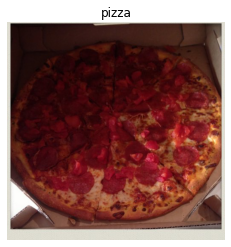

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[218, 216, 204],
        [222, 220, 208],
        [221, 219, 207],
        ...,
        [218, 216, 204],
        [222, 220, 208],
        [225, 225, 213]],

       [[222, 220, 208],
        [225, 223, 211],
        [223, 221, 209],
        ...,
        [225, 223, 211],
        [224, 222, 210],
        [221, 221, 209]],

       [[222, 220, 208],
        [225, 223, 211],
        [223, 221, 209],
        ...,
        [227, 225, 213],
        [224, 222, 210],
        [219, 219, 207]],

       ...,

       [[227, 225, 213],
        [224, 222, 210],
        [220, 218, 206],
        ...,
        [219, 219, 207],
        [218, 218, 206],
        [219, 219, 207]],

       [[225, 223, 211],
        [224, 222, 210],
        [222, 220, 208],
        ...,
        [221, 221, 209],
        [219, 219, 207],
        [220, 220, 208]],

       [[217, 215, 203],
        [222, 220, 208],
        [226, 224, 212],
        ...,
        [224, 224, 21

In [ ]:
# View the image shape
img.shape

(512, 512, 3)

🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value)

In [ ]:
# Get all the pixel values in 0 and 1
img/225.

array([[[0.96888889, 0.96      , 0.90666667],
        [0.98666667, 0.97777778, 0.92444444],
        [0.98222222, 0.97333333, 0.92      ],
        ...,
        [0.96888889, 0.96      , 0.90666667],
        [0.98666667, 0.97777778, 0.92444444],
        [1.        , 1.        , 0.94666667]],

       [[0.98666667, 0.97777778, 0.92444444],
        [1.        , 0.99111111, 0.93777778],
        [0.99111111, 0.98222222, 0.92888889],
        ...,
        [1.        , 0.99111111, 0.93777778],
        [0.99555556, 0.98666667, 0.93333333],
        [0.98222222, 0.98222222, 0.92888889]],

       [[0.98666667, 0.97777778, 0.92444444],
        [1.        , 0.99111111, 0.93777778],
        [0.99111111, 0.98222222, 0.92888889],
        ...,
        [1.00888889, 1.        , 0.94666667],
        [0.99555556, 0.98666667, 0.93333333],
        [0.97333333, 0.97333333, 0.92      ]],

       ...,

       [[1.00888889, 1.        , 0.94666667],
        [0.99555556, 0.98666667, 0.93333333],
        [0.97777778, 0

### End to End Convolution Networks Example

Build a convolution neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# Set random seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scalling/normalisation)
train_datagen = ImageDataGenerator(rescale= 1./255)
valid_datagen  = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and return it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory= test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),

   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),

   tf.keras.layers.Conv2D(10,3, activation="relu"),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.MaxPool2D(2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(1,activation="sigmoid")

])

# Compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history= model_1.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data= valid_data,
                     validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 254ms/step - loss: 0.5445 - accuracy: 0.7247 - val_loss: 0.3814 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4168 - accuracy: 0.8093 - val_loss: 0.3212 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4043 - accuracy: 0.8280 - val_loss: 0.3531 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3670 - accuracy: 0.8413 - val_loss: 0.3041 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3321 - accuracy: 0.8567 - val_loss: 0.2915 - val_accuracy: 0.8780


In [ ]:
# Get the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
## Using the same model built in classification section

# set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss= 'binary_crossentropy',
                optimizer="Adam",
                metrics=["accuracy"])
# Fit the model
history_2= model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps= len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 0.9311 - accuracy: 0.5153 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.4667 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# get summary of mode_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,121
Trainable params: 602,121
Non-trainable params: 0
_________________________________________________________________


despite having more than 60000 parameters... it performs worst than cnn

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_3
model_3.compile(loss= 'binary_crossentropy',
                optimizer="Adam",
                metrics=["accuracy"])
# Fit the model_3
history_3= model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 3.0578 - accuracy: 0.6393 - val_loss: 0.5536 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.7944 - accuracy: 0.7140 - val_loss: 0.5673 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6782 - accuracy: 0.7373 - val_loss: 0.5059 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6049 - accuracy: 0.7507 - val_loss: 0.5377 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6039 - accuracy: 0.7553 - val_loss: 0.6911 - val_accuracy: 0.6880


In [ ]:
# Summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## 1. Become one with the data

1. Become one with the data (Visualize, Visualize, Visualize)
2. Preprocess the data (prepare it for our model, the main step here is scaling/normalizing & turning our data into batches)
3. Create a model (Start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeate untill satisfied (Experiment, Experiment, Experiment)

### 1. Become one with the data

['143490.jpg']
Image shape: (512, 384, 3)
['2154394.jpg']
Image shape: (512, 512, 3)


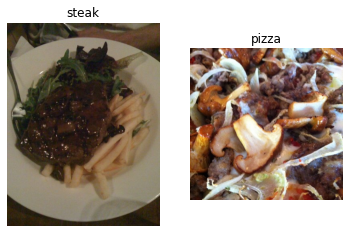

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir ="pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

Why 32?


In [ ]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of image
                                               target_size=(224,224), # target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into
test_data = test_datagen.flow_from_directory (directory=test_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a  sample of training bacth
images, labels = train_data.next() # get the "next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7], images[7].shape

(array([[[0.30588236, 0.17254902, 0.227451  ],
         [0.34901962, 0.21960786, 0.25490198],
         [0.4039216 , 0.2784314 , 0.2901961 ],
         ...,
         [0.16470589, 0.02745098, 0.1137255 ],
         [0.16862746, 0.01960784, 0.10980393],
         [0.15686275, 0.00784314, 0.10588236]],
 
        [[0.28235295, 0.14901961, 0.20392159],
         [0.34117648, 0.21176472, 0.24705884],
         [0.42352945, 0.29803923, 0.30980393],
         ...,
         [0.17254902, 0.02352941, 0.1137255 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16078432, 0.01176471, 0.10980393]],
 
        [[0.2627451 , 0.13725491, 0.19607845],
         [0.3254902 , 0.20000002, 0.24313727],
         [0.41960788, 0.29803923, 0.31764707],
         ...,
         [0.19215688, 0.04313726, 0.1254902 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16862746, 0.03137255, 0.1254902 ]],
 
        ...,
 
        [[0.62352943, 0.5803922 , 0.5568628 ],
         [0.6039216 , 0.56078434, 0.53725

In [ ]:
# View the first bactch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experimenting, you try to beat the baseline

In [ ]:
# Making the model creation a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolution neural network)
model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # Input layer (specify input sahpe)
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")    # output layer (working with binary classification so only one neuron)               
])

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get the summary of model_4
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting model_4
history_4= model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 1.0070 - accuracy: 0.6573 - val_loss: 0.4843 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4750 - accuracy: 0.7913 - val_loss: 0.4147 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3292 - accuracy: 0.8727 - val_loss: 0.3535 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.1717 - accuracy: 0.9487 - val_loss: 0.3805 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.0735 - accuracy: 0.9833 - val_loss: 0.4984 - val_accuracy: 0.8080


### 5. Evaluating our model

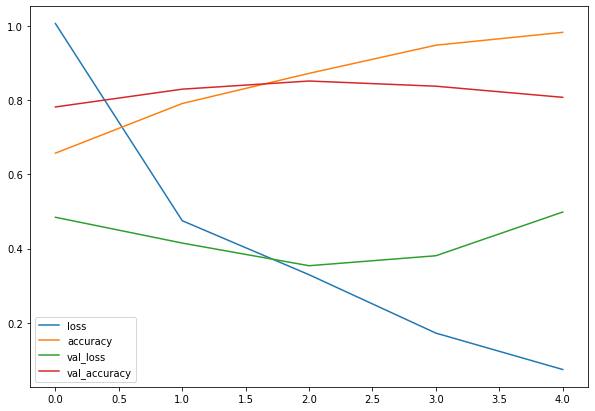

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot validation and trainig curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs= range(len(history.history["loss"]))
  #plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() # whenever you need new figure, write plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

In [ ]:
epochs= range(len(history.history["loss"]))
epochs

range(0, 5)

**Note** when the model's  **Validation loss start to increase,** it's likely that the model is **overfitting** the training dataset *too well* and thus the model's ability to genealize to unseen data will be diminished.

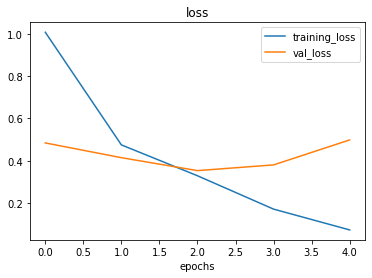

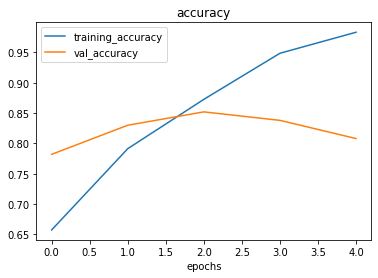

In [ ]:
plot_loss_curves(history_4)

**Note** Ideally the two curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **Overfitting**

### 6. Adjust the model parameter

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

ways to reduce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer.


**Note:** Reducing oerfitting is also known as **regularization**

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),

  Conv2D(10,3, activation="relu"),
  MaxPool2D(),

  Conv2D(10,3, activation="relu"),
  MaxPool2D(),

  Flatten(),
  Dense(1, activation="sigmoid")                 
])

In [ ]:
# Comile the model_5
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model_5
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6106 - accuracy: 0.6567 - val_loss: 0.4459 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4673 - accuracy: 0.7873 - val_loss: 0.3838 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4354 - accuracy: 0.8093 - val_loss: 0.3771 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4067 - accuracy: 0.8173 - val_loss: 0.3650 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3959 - accuracy: 0.8333 - val_loss: 0.3370 - val_accuracy: 0.8700


In [ ]:
# Get the summary of model_5 with max_pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


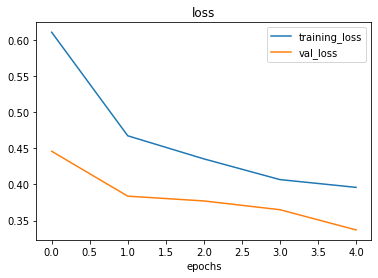

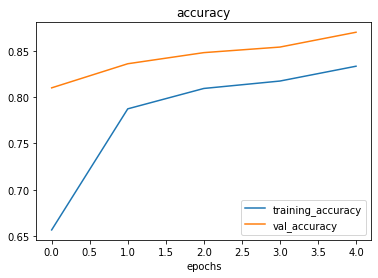

In [ ]:
# plot the loss curves of model_5
plot_loss_curves(history_5)

### Data Augmentation

In [ ]:
#Create ImageDataGenerator training instances with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-aixs
                                             horizontal_flip=True) # do you want to flip an image

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator (rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**What is data augmentation??**

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable(hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

### Visualize data augmentation

In [ ]:
# Import data and augmented it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purpose

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE= (224,224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            class_mode="binary",
                                            shuffle=False)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note** Data augmentation is usualyy performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels are not augmented

Showing image number: 29


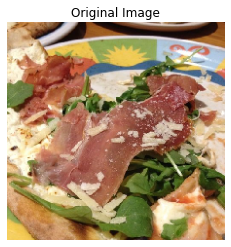

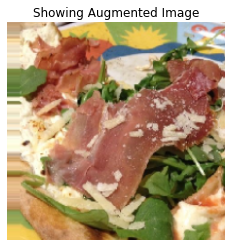

In [ ]:
# Show original image  and augmented image
import random
random_number = random.randint(0,31) # our batch sizes are 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Showing Augmented Image")
plt.axis(False);

In [ ]:
# Create a model with augmented data
model_6 = Sequential([
   Conv2D(10,3, activation="relu"),
   MaxPool2D(pool_size=2),
   Conv2D(10,3,activation="relu"),
   MaxPool2D(),
   Conv2D(10,3,activation="relu"),
   MaxPool2D(),

   Flatten(),
   Dense(1, activation="sigmoid")
])

# Compile the model_6
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model_6
history_6= model_6.fit(train_data_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 33s 699ms/step - loss: 0.7052 - accuracy: 0.4940 - val_loss: 0.6805 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 21s 452ms/step - loss: 0.7097 - accuracy: 0.4900 - val_loss: 0.6840 - val_accuracy: 0.6820
Epoch 3/5
47/47 [==============================] - 21s 448ms/step - loss: 0.6879 - accuracy: 0.5887 - val_loss: 0.6423 - val_accuracy: 0.5740
Epoch 4/5
47/47 [==============================] - 21s 450ms/step - loss: 0.6747 - accuracy: 0.6393 - val_loss: 0.5793 - val_accuracy: 0.6900
Epoch 5/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6660 - accuracy: 0.6160 - val_loss: 0.5989 - val_accuracy: 0.7140


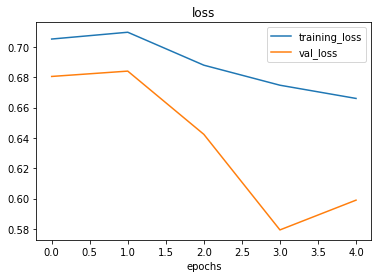

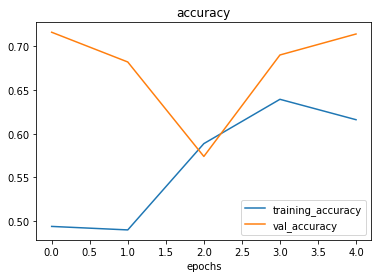

In [ ]:
# Check the loss curve
plot_loss_curves(history_6)

Let's shuffle the augmented training data and train another model (the same as before) on it and see what happens.

In [ ]:
# Import data and augment it and shuffel from directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True # Shuffling the data this time

                                                                            )

Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model_7 (same as model_6 $ model_5) but this time with shuffeled augmented data
model_7 = Sequential([
  Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile model_7
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model_7
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 451ms/step - loss: 0.6339 - accuracy: 0.6193 - val_loss: 0.5086 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 22s 477ms/step - loss: 0.5037 - accuracy: 0.7533 - val_loss: 0.3896 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 21s 447ms/step - loss: 0.4826 - accuracy: 0.7580 - val_loss: 0.3466 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 21s 444ms/step - loss: 0.4508 - accuracy: 0.8080 - val_loss: 0.3217 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 21s 444ms/step - loss: 0.4846 - accuracy: 0.7713 - val_loss: 0.3667 - val_accuracy: 0.8580


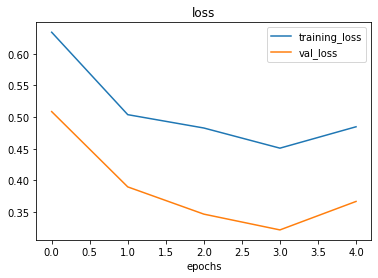

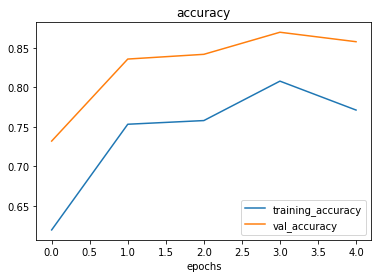

In [ ]:
# training loss curves
plot_loss_curves(history_7)

### Making prediction with our trained model on our custom data

In [ ]:
# Classes we're working on
print(class_names)

['pizza' 'steak']


--2022-02-02 13:10:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-02-02 13:10:29 (185 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



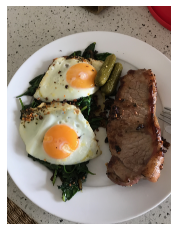

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the sahpe of our image
steak.shape

(4032, 3024, 3)

**Note** When we train a neural network and we want to make prediction with it on our own custom data, it's important that our custom data( or the new data) is preprocessed into same format as the data our model was trained on.

In [ ]:
# creating a funtion to import and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
      Reads an image from a filename, turns it into a tensor and reshapes it
      to (img_shape, img_shape, colour_channels)
      """
    # Read in the image
    img = tf.io.read_file(filename)

    # Decode the read file into tensor
    img = tf.image.decode_image(img)

    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # rescale the image (get all the values between 0 & 1)
    img = img/255.

    return img

In [ ]:
# Load and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.8982866]], dtype=float32)

Here, our custom image is put through the model, but it is currently outputting prediction probabilities.

Let's visualize the image and it prediction.

In [ ]:
# We can index the predicted class by rounding the prediction and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """
  
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make the prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predict class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

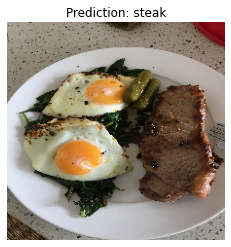

In [ ]:
# Test our model on custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2022-02-02 13:10:31--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2022-02-02 13:10:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-02-02 13:10:31 (232 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

FINISHED --2022-02-02 13:10:31--
Total wall clock time: 0.2s
Downloaded: 1 files, 2.7M in 0.01s (232 MB/s)


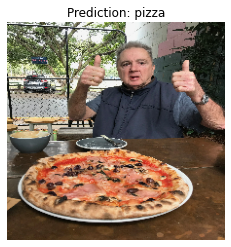

In [ ]:
# Lets try diff image
!wget !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

### Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust differet hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

In [ ]:
## Import our data and become with it
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-02 13:10:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 142.251.45.16, 172.217.0.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   132MB/s    in 3.8s    

2022-02-02 13:10:36 (130 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} iamges in '{dirpath}'.")

There are 2 directories and 0 iamges in '10_food_classes_all_data'.
There are 10 directories and 0 iamges in '10_food_classes_all_data/test'.
There are 0 directories and 250 iamges in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 iamges in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 iamges in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 iamges in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 iamges in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 iamges in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 iamges in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 iamges in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 iamges in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 iamges in '10_food_classes_all_data/test/pizza'.
There are 

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


### 2. Preprocess the data (Prepare it for model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a CNN Model (With a baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [ ]:
# Create a model
model_8 = Sequential([
  Conv2D(10,3, input_shape=(224,224,3)),
  Activation(activation="relu"),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3, activation="relu"),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # Changed to have 10 output neurons and use softmax                 
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 186ms/step - loss: 2.1663 - accuracy: 0.2080 - val_loss: 2.0599 - val_accuracy: 0.2384
Epoch 2/5
235/235 [==============================] - 43s 182ms/step - loss: 1.9246 - accuracy: 0.3296 - val_loss: 1.9838 - val_accuracy: 0.3000
Epoch 3/5
235/235 [==============================] - 43s 185ms/step - loss: 1.5548 - accuracy: 0.4725 - val_loss: 1.9811 - val_accuracy: 0.3300
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 0.9295 - accuracy: 0.6981 - val_loss: 2.4028 - val_accuracy: 0.2884
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 0.3458 - accuracy: 0.8983 - val_loss: 3.5946 - val_accuracy: 0.2864


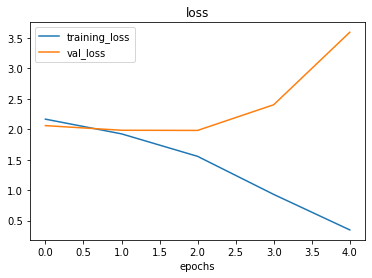

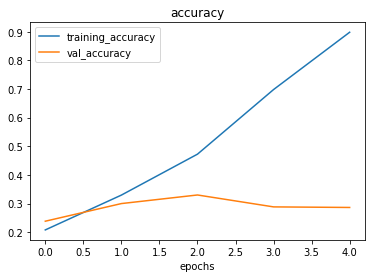

In [ ]:
# Plot curve
plot_loss_curves(history_8)

In [ ]:
# Let's simplyfy our model first
# Try to remove 2 